In [288]:
import skimage.measure as skm
import math
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import warnings
from skimage import io
import pandas as pd

In [30]:
ruta ="https://github.com/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/raw/main/Imagenes/"
imgs=[]
for i in range(1,315):
  imgs.append(str(i)+".png")
warnings.filterwarnings('ignore')

#Funciones de análisis

In [271]:
def interparc(npoints, pxy):
    N = np.transpose(np.linspace(0,1,npoints))
    nt = N.size

    #number of points on the curve
    n = np.size(pxy, 0)
    #pxy = np.array((pX,pY)).T
    p1 = pxy[0,:]
    pend = pxy[-1,:]
    last_segment = np.linalg.norm(np.subtract(p1,pend))
    epsilon = 10*np.finfo(float).eps

    #IF the two end points are not close enough lets close the curve
    if last_segment > epsilon*np.linalg.norm(np.amax(abs(pxy),axis=0)):
        pxy=np.vstack((pxy,p1))
        nt = nt + 1
    else:
       pass

    datos = np.zeros((nt,2))

    #Compute the chordal arclength of each segment.
    chordlen = (np.sum(np.diff(pxy,axis=0)**2.0,axis=1))**(1/2)
    #Normalize the arclengths to a unit total
    chordlen = chordlen/np.sum(chordlen)
    #cumulative arclength
    cumarc = np.append(0,np.cumsum(chordlen))

    tbins= np.digitize(N,cumarc) # bin index in which each N is in
    #catch any problems at the ends
    tbins[np.where(tbins<=0 | (N<=0))]=1
    tbins[np.where(tbins >= n | (N >= 1))] = n - 1      
    s = np.divide((N - cumarc[tbins]),chordlen[tbins-1])
    datos = pxy[tbins,:] + np.multiply((pxy[tbins,:] - pxy[tbins-1,:]),(np.vstack([s]*2)).T)

    return datos

###################################################


def getContour(imName, npoints):
  im = io.imread(imName)
  imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(imgray,200, 255,0)
  contour=skm.find_contours(thresh,level=0.6, fully_connected="high")
  data=[]
  for points in contour:
    for i in points:
      data.append(i)
  contour=np.reshape(data, (len(data),2))
  contour=interparc(npoints,contour)
  meancon=np.mean(contour,axis=0)
  contour=(contour-meancon)/np.std(contour,axis=0)
  return contour,im
    
def arc_length(contor):
  dx=np.diff(contor[:,0])
  dy=np.diff(contor[:,1])
  length=(dx**2+dy**2)**(1/2)
  return np.sum(length)

def distances(x,y,centro):
    dist1=np.linalg.norm(x-centro)
    dist2=np.linalg.norm(y-centro)
    dist3=np.linalg.norm(y-x)
    return dist1,dist2,dist3

def area_contorno(contor):
  centro=np.mean(contor,axis=0)
  areaTotal=0
  for i in range(len(contor)):
    v1=i%len(contor)
    v2=(i+1)%len(contor)
    a,b,c=distances(contor[v1],contor[v2],centro)
    area=0.25*(abs((a**2+b**2+c**2)**2-2*(a**4+b**4+c**4)))**(1/2)
    areaTotal+=area
  return areaTotal

def props(path):
  im=io.imread(path)
  im=np.floor(im/255)[:,:,0]
  im=np.array(im,dtype=int)
  prop=skm.regionprops(im)[0]
  ar=prop.area
  per=prop.perimeter
  ecc=prop.eccentricity
  ma_x=prop.major_axis_length
  me_x=prop.minor_axis_length
  cent=prop.centroid
  return ar,per,ecc,ma_x,me_x,cent



In [352]:
#Gráficas

def Grafica(im, contorno, path,tolerancia):
  fig, axs = plt.subplots(1,4)
  fig.set_size_inches(15,4)
  fig.tight_layout(pad=0.3)

  ################################### Imagen

  axs[0].set_title(path)
  axs[0].imshow(im)
  axs[0].axis("off")

  ############################################## Contorno
  x=contorno[:,0]
  y=contorno[:,1]
  axs[1].set_title(path)
  axs[1].set_ylim(bottom=1.5*min(y),top=1.5*max(y))
  axs[1].set_xlim(left=1.5*min(x),right=1.5*max(x))
  axs[1].plot(x,y,"-")
  axs[1].axis("off")

  ######################################################### Componentes
  basex=np.arange(len(x))
  basey=np.arange(len(y))
  axs[2].plot(basex,x,".",label="Componente x de la imagen")
  axs[2].plot(basey,y,".",label="Componente y de la imagen")
  axs[2].set_title(path)
  axs[2].legend()

  ######################################################### Polígono
  poligono=skm.approximate_polygon(contorno, tolerance=tolerancia)
  px=poligono[:,0]
  py=poligono[:,1]
  axs[3].plot(px,py,"-g")
  axs[3].set_ylim(bottom=1.5*min(py),top=1.5*max(py))
  axs[3].set_xlim(left=1.5*min(px),right=1.5*max(px))
  axs[3].set_title(f"Polígono asociado a la imagen {path}")
  axs[3].axis("off")
  
  plt.show()   

In [244]:
#Matriz de contornos
npoints=512
Contorno=np.zeros(shape=(len(imgs),npoints,2))
Imagenes=[]
cont=0
for path in imgs:
  contor,im=getContour(ruta+path,npoints)
  Imagenes.append(im)
  Contorno[cont]=contor
  cont+=1

Algunas hojas impresas al azar

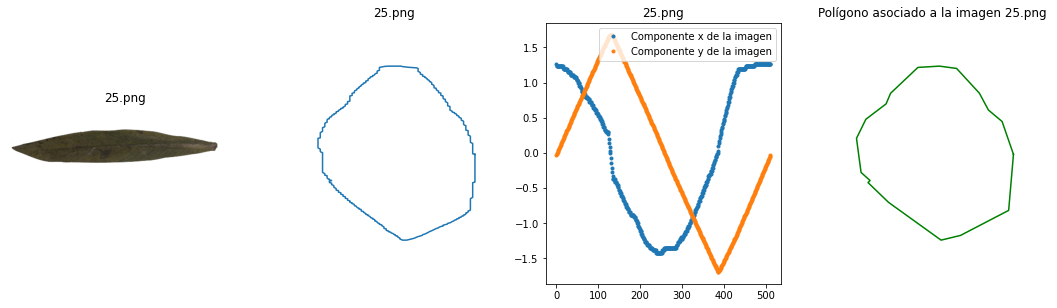

___________________________________________________________________________________________________________________________________________________


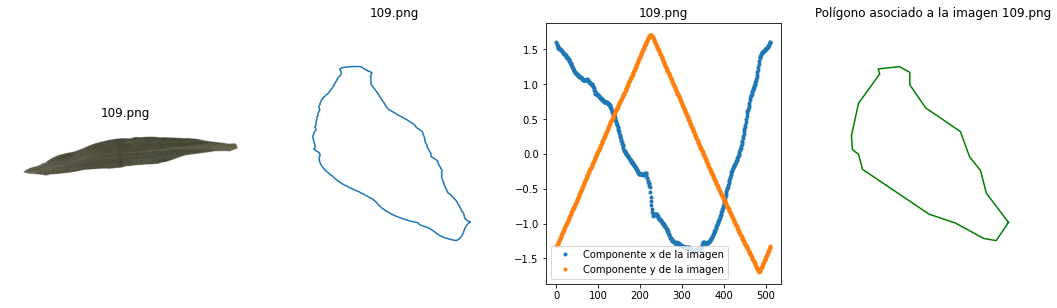

___________________________________________________________________________________________________________________________________________________


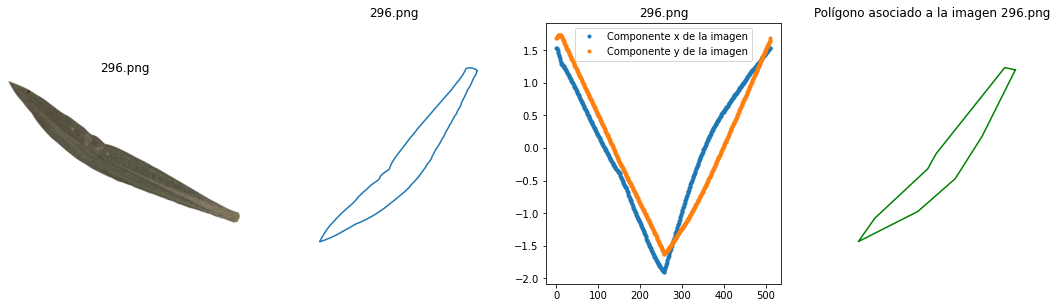

___________________________________________________________________________________________________________________________________________________


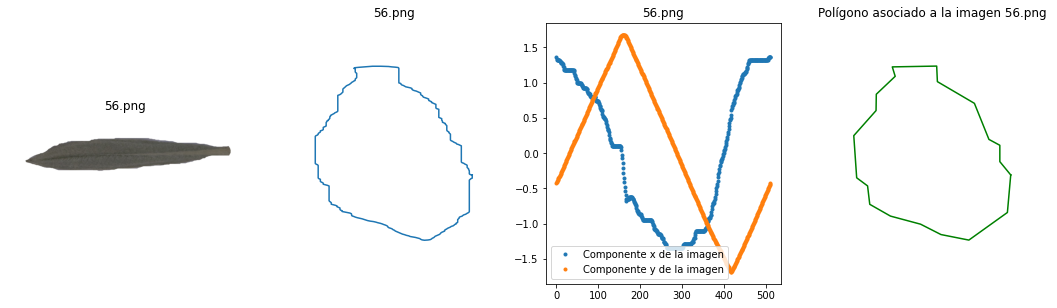

___________________________________________________________________________________________________________________________________________________


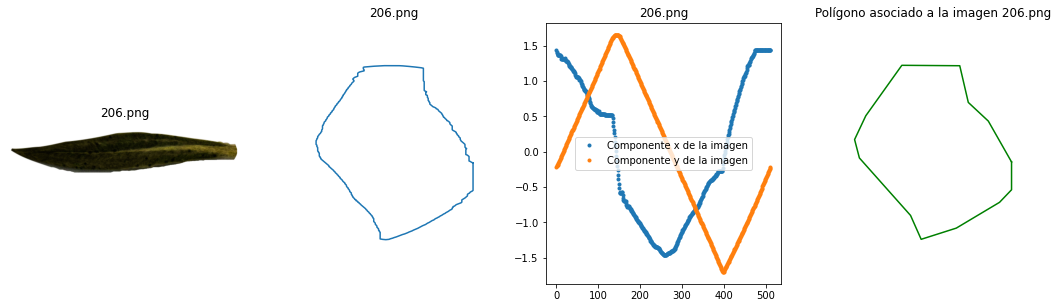

___________________________________________________________________________________________________________________________________________________


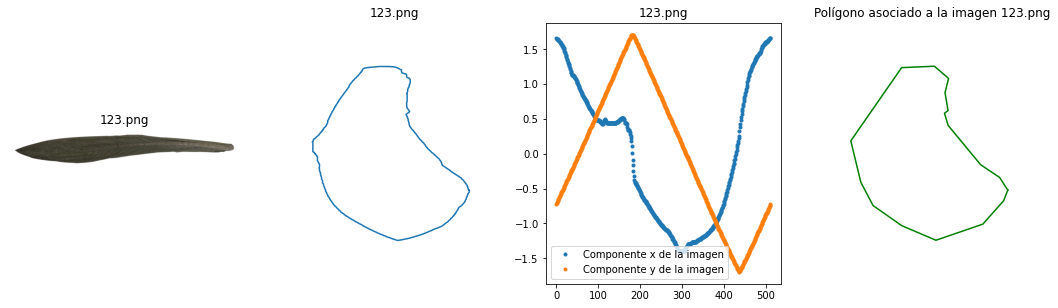

___________________________________________________________________________________________________________________________________________________


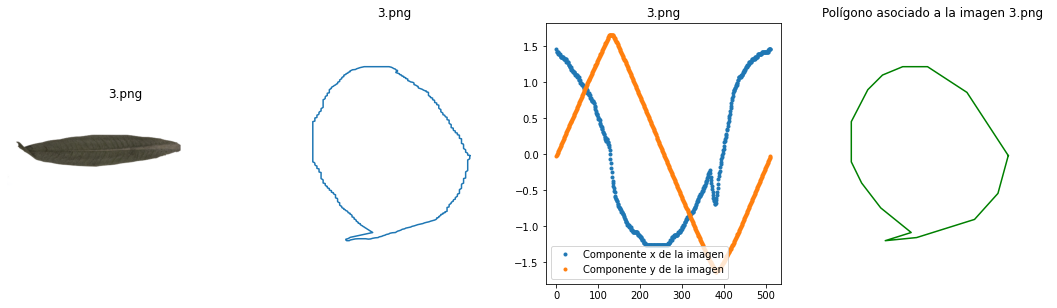

___________________________________________________________________________________________________________________________________________________


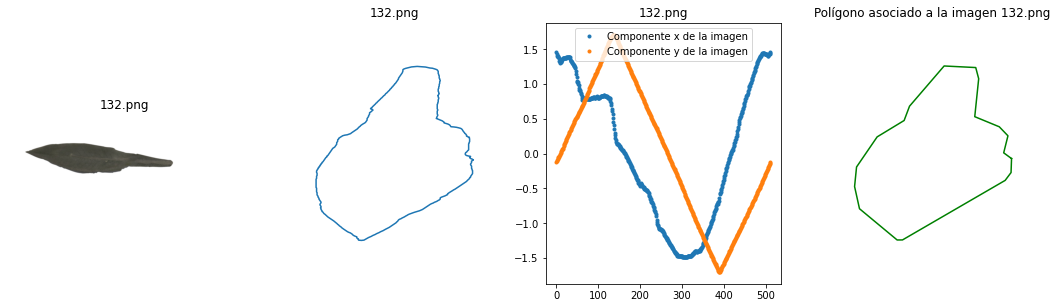

___________________________________________________________________________________________________________________________________________________


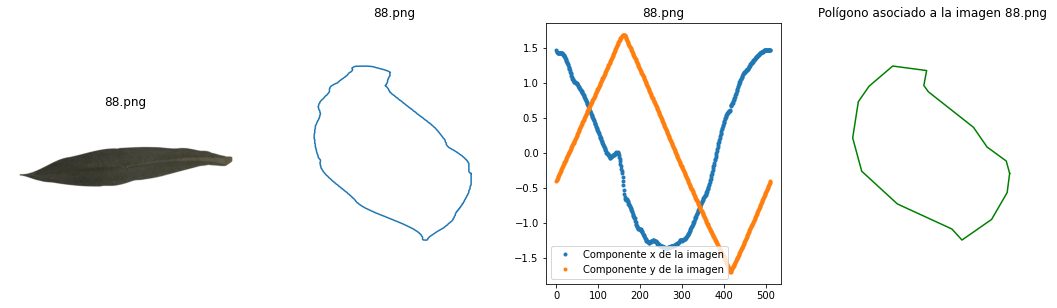

___________________________________________________________________________________________________________________________________________________


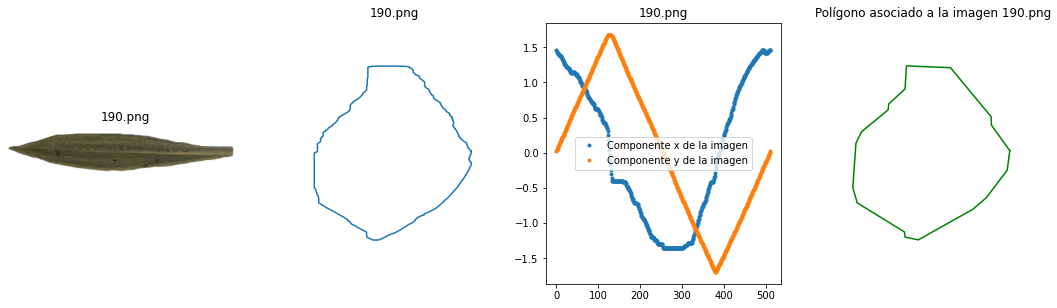

___________________________________________________________________________________________________________________________________________________


In [353]:
for i in range(10):
  a=random.choice(range(len(imgs)))
  Grafica(Imagenes[a],Contorno[a],imgs[a],tolerancia=0.05)
  print("___________________________________________________________________________________________________________________________________________________")

Hallando Características:

In [287]:
Area=[]
Perimetro=[]
Centro=[]
Dist_eje_mayor=[]
Dist_eje_menor=[]
Eccentricidad=[]

for i in imgs:
  area,perim,ecce,ma_x,me_x, cent=props(ruta+i)
  Area.append(area)
  Perimetro.append(perim)
  Eccentricidad.append(ecce)
  Dist_eje_mayor.append(ma_x)
  Dist_eje_menor.append(me_x)
  Centro.append(np.array(cent))


Generando el dataframe de los datos obtenidos de la imágenes

In [300]:
df=pd.DataFrame()
df["Imagen"]=imgs
df["Perímetro"]=Perimetro
df["Area"]=Area
df["Longitud del eje central mayor"]=Dist_eje_mayor
df["Longitud del eje central menor"]=Dist_eje_menor
df["Eccentricidad"]=Eccentricidad
df["Centroide"]=Centro

###Descripción de los datos

In [332]:
df.describe()

,Perímetro,Area,Longitud del eje central mayor,Longitud del eje central menor,Eccentricidad
count,314.000000,3.140000e+02,314.000000,314.000000,314.000000
mean,7960.054949,7.355120e+05,2098.821945,701.272888,0.915758
std,2804.971544,7.023023e+05,720.253167,374.745033,0.097706
min,2004.208153,6.281000e+04,502.795792,192.188864,0.384353
25%,6121.657467,3.152985e+05,1665.453131,462.655742,0.911776
50%,7818.664610,5.027975e+05,2123.418441,586.561543,0.951418
75%,9879.234505,8.870805e+05,2514.033406,822.696932,0.972398
max,17336.919549,4.431088e+06,3738.525312,2488.644394,0.991488


Diagramas de Caja y de violín para cada característica 

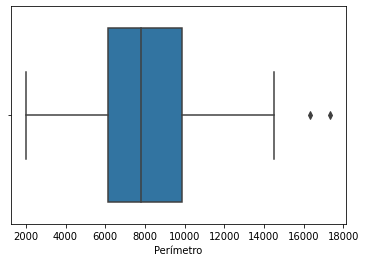

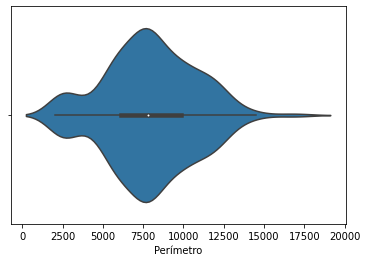

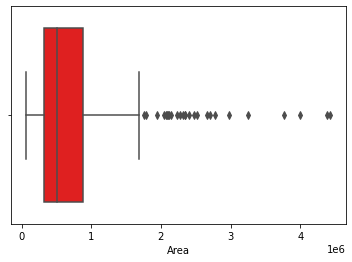

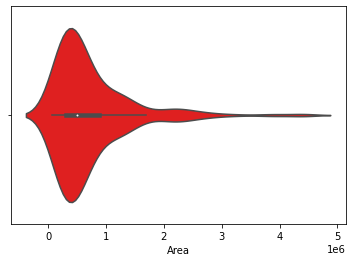

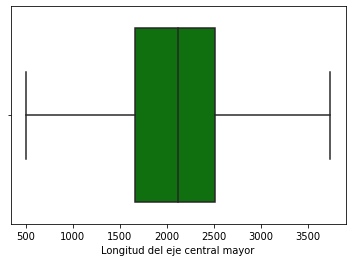

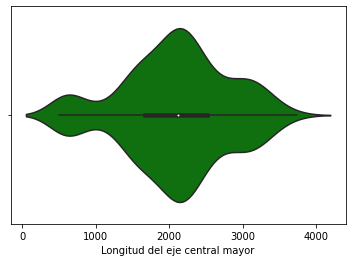

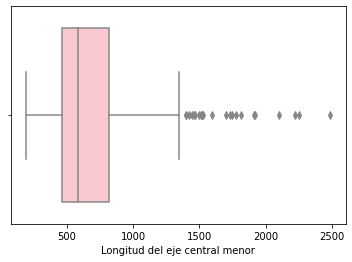

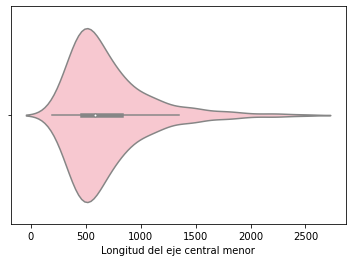

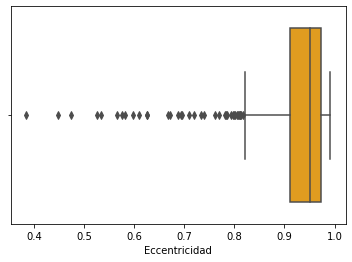

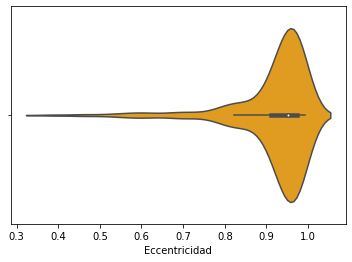

In [357]:
sns.boxplot("Perímetro",data=df)
plt.show()
sns.violinplot("Perímetro",data=df)
plt.show()

sns.boxplot("Area",data=df, color="red")
plt.show()
sns.violinplot("Area",data=df,color="red")
plt.show()

sns.boxplot("Longitud del eje central mayor",data=df,color="green")
plt.show()
sns.violinplot("Longitud del eje central mayor",data=df,color="green")
plt.show()

sns.boxplot("Longitud del eje central menor",data=df,color="pink")
plt.show()
sns.violinplot("Longitud del eje central menor",data=df, color="pink")
plt.show()

sns.boxplot("Eccentricidad",data=df, color="orange")
plt.show()
sns.violinplot("Eccentricidad",data=df,color="orange")
plt.show()

Transfomrada discreta Fourier

In [333]:
j = cmath.sqrt(-1)
features= np.zeros((len(imgs),npoints-1),dtype=complex)
for i in range(len(imgs)):
  x=Contorno[i,:,0]-Contorno[i,:,1]*j
  dx  = np.diff(x, axis=0)
  norm_x=np.absolute(dx)
  x=np.divide(dx,norm_x)
  armonics=np.fft.fft(x)
  features[i]=armonics      #Espacio de características

#Pruebas y errores


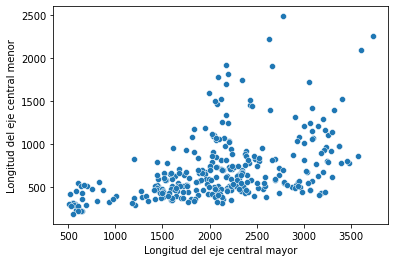

In [346]:
sns.scatterplot(x="Longitud del eje central mayor",y="Longitud del eje central menor",data=df)
#sns.regression.regplot(x="Longitud del eje central mayor",y="Longitud del eje central menor",data=df)
#sns.regression.regplot(x="Perímetro",y="Area",data=df,order=2)